In [1]:
import re
import string
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('cnn_indonesia_berita_10_pages.csv')
data.head()

,title,link,category,content,date
0,Sumardji Bantah Simon Tahamata Jadi Kepala Sco...,https://www.cnnindonesia.com/olahraga/20250519...,olahraga,Ketua Badan Tim Nasional (BTN) Sumardji memban...,NaN
1,Pengamat Sebut Absennya Pemain Persib di Timna...,https://www.cnnindonesia.com/olahraga/20250519...,olahraga,Pengamat sepak bola nasional Supriyono Prima m...,NaN
2,Tiket Timnas Indonesia vs ChinaSold OutTanpa T...,https://www.cnnindonesia.com/olahraga/20250519...,olahraga,TiketTimnas Indonesia vs Chinadalam lanjutan K...,NaN
3,Timnas Futsal Indonesia Ingin Jajal Belanda da...,https://www.cnnindonesia.com/olahraga/20250519...,olahraga,Timnas Futsal Indonesiamengincar kesempatan be...,NaN
4,Pengamat: Tak Perlu Ributkan Elkan Baggott di ...,https://www.cnnindonesia.com/olahraga/20250519...,olahraga,Pengamat sepak bola nasional Supriyono Prima m...,NaN


Model partitioning KMeans DBCSAN

In [3]:
data['category'].value_counts()

category
olahraga         100
ekonomi          100
nasional         100
internasional    100
teknologi        100
otomotif         100
Name: count, dtype: int64

In [4]:
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
count_foto = data['title'].str.contains('FOTO:', case=True).sum()
print(count_foto)

28


In [6]:
filtered_data = data[~data['title'].str.contains('FOTO:', na=False)].reset_index(drop=True)
filtered_data.head()

,title,link,category,content,date
0,Prediksi Cuaca Sepekan: Masih Ada Potensi Huja...,https://www.cnnindonesia.com/teknologi/2025050...,teknologi,"Badan Meteorologi, Klimatologi, dan Geofisika ...",NaN
1,"Perhatikan Baik-baik, Berikut 9 Cara Agar Hp T...",https://www.cnnindonesia.com/teknologi/2025051...,teknologi,Smartphonekini telah menjadi bagian penting da...,NaN
2,"Calon Haji RI Meninggal Dunia di Mekkah, Disal...",https://www.cnnindonesia.com/nasional/20250518...,nasional,Jamaah calonhajiasal Kabupaten Ogan Komering U...,NaN
3,Menteri Pertanian Jepang Minta Maaf usai Pamer...,https://www.cnnindonesia.com/internasional/202...,internasional,"Menteri PertanianJepang, Taku Eto, meminta maa...",NaN
4,"Rusuh di Lampung Tengah Usai Penusukan, Rumah ...",https://www.cnnindonesia.com/nasional/20250519...,nasional,Kerusuhan berujung pembakaran bangunan dan ken...,NaN


In [7]:
import random

sample = data.groupby('category', group_keys=False).apply(
    lambda x: x.sample(n=random.randint(25, 30), random_state=42)
).reset_index(drop=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13832\3570413637.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = data.groupby('category', group_keys=False).apply(


In [8]:
sample['category'].value_counts()

category
otomotif         30
internasional    29
olahraga         29
teknologi        29
nasional         28
ekonomi          26
Name: count, dtype: int64

In [9]:
# shuffle the sample data
sample = sample.sample(frac=1, random_state=42).reset_index(drop=True)
sample.head(10)

,title,link,category,content,date
0,"Inter Miami Keok Lagi, Messi Enggak Bisa Berkutik",https://www.cnnindonesia.com/olahraga/20250519...,olahraga,"AdaLionel Messi, tapiInter Miamikalah lagi. It...",NaN
1,Polisi Tangkap Pelaku Perusakan Nisan Makam di...,https://www.cnnindonesia.com/nasional/20250519...,nasional,Polisimenangkap seorang pemuda yang diduga jad...,NaN
2,Dakwaan Eks Ketua PN Surabaya di Kasus Ronald ...,https://www.cnnindonesia.com/nasional/20250519...,nasional,Jaksa Penuntut Umum pada Kejaksaan Agung akan ...,NaN
3,Indonesia Kebanjiran Investasi Otomotif Rp157 ...,https://www.cnnindonesia.com/otomotif/20250509...,otomotif,Menteri Menteri Investasi dan HilirisasiRosan ...,NaN
4,BMKG Wanti-wanti Dunia Sedang Bergerak Menuju ...,https://www.cnnindonesia.com/teknologi/2025050...,teknologi,"Kepala Badan Meteorologi, Klimatologi, dan Geo...",NaN
5,"Demo Ojol 20 Mei, Polisi Siapkan Rekayasa Lalu...",https://www.cnnindonesia.com/nasional/20250518...,nasional,DitlantasPolda Metro Jayamenyiapkan rekayasa l...,NaN
6,"VIDEO: Wasiat Paus Fransiskus, Popemobile Diub...",https://www.cnnindonesia.com/otomotif/20250506...,otomotif,Salah satu mobil kepausan milik Paus Fransisku...,NaN
7,Klasemen Liga 1 Usai PSS Menang Dramatis atas ...,https://www.cnnindonesia.com/olahraga/20250517...,olahraga,Klasemen Liga 1mengalami perubahan usai Persij...,NaN
8,"Palermo Gagal ke Serie A, Peluang Besar Emil A...",https://www.cnnindonesia.com/olahraga/20250518...,olahraga,Palermo kalah di laga pertama playoff menuju S...,NaN
9,Asnawi dan Stefano Lilipaly Kembali ke Timnas ...,https://www.cnnindonesia.com/olahraga/20250518...,olahraga,Asnawi MangkualamdanStefano Lilipalykembali me...,NaN


In [10]:
print(f"Total data before preprocessing: {sample.shape[0]}")

Total data before preprocessing: 171


In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[' + re.escape(string.punctuation) + ']', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text) # Remove extra whitespace
    text = text.strip() # Remove leading/trailing whitespace
    return text

In [12]:
def preprocess_pipeline(data, text_column, lang='english', vectorizer='tfidf'):
    df = pd.DataFrame(data)
    df = df[[text_column]].copy()
    # df.drop_duplicates(inplace=True)
    # df.reset_index(drop=True, inplace=True)

    stop_words = set(stopwords.words(lang))
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    # lemmatizer = WordNetLemmatizer()

    df[f'{text_column}_clean'] = df[text_column].apply(clean_text) # Clean text
    df[f'{text_column}_tokenized'] = df[f'{text_column}_clean'].apply(word_tokenize) # Tokenize text
    df[f'{text_column}_clean'] = df[f'{text_column}_tokenized'].apply(lambda x: [word for word in x if word not in stop_words]) # Remove stop words
    df[f'{text_column}_clean'] = df[f'{text_column}_clean'].apply(lambda x: ' '.join(x)) # Join tokens back to string
    df[f'{text_column}_clean'] = df[f'{text_column}_clean'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()])) # Stem words

    if vectorizer == 'tfidf':
        vectorizer = TfidfVectorizer()
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(df[f'{text_column}_clean'])
    elif vectorizer == 'count':
        vectorizer = CountVectorizer()
        vectors = vectorizer.fit_transform(df[f'{text_column}_clean'])
        
    return df, vectors, vectorizer
    

In [13]:
from concurrent.futures import ThreadPoolExecutor, as_completed

# Inisialisasi alat preprocessing
stop_words_id = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_single_row(text):
    cleaned = clean_text(text)
    tokens = word_tokenize(cleaned)
    tokens = [token for token in tokens if token not in stop_words_id and len(token) > 2]
    stemmed = stemmer.stem(' '.join(tokens))
    return stemmed

def parallel_preprocess_pipeline(data, text_column, lang='indonesian', vectorizer_type='tfidf', max_workers=4):
    df = pd.DataFrame(data)
    df = df[[text_column]].copy()
    # df.drop_duplicates(inplace=True)
    # df.reset_index(drop=True, inplace=True)

    print("🚀 Memulai preprocessing dengan paralelisasi...")

    texts = df[text_column].tolist()
    processed_texts = []

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_idx = {executor.submit(preprocess_single_row, text): i for i, text in enumerate(texts)}
        
        for future in as_completed(future_to_idx):
            idx = future_to_idx[future]
            try:
                result = future.result()
                processed_texts.append((idx, result))
            except Exception as exc:
                print(f"Baris {idx} gagal karena error: {exc}")
                processed_texts.append((idx, ""))  # Masukkan string kosong jika error

    # Urutkan hasil sesuai index
    processed_texts.sort(key=lambda x: x[0])
    cleaned_list = [text for idx, text in processed_texts]

    # Simpan ke DataFrame
    df[f'{text_column}_clean'] = cleaned_list

    # Vectorization
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
    elif vectorizer_type == 'count':
        vectorizer = CountVectorizer()
    else:
        raise ValueError("vectorizer_type harus 'tfidf' atau 'count'")
    
    vectors = vectorizer.fit_transform(df[f'{text_column}_clean'])

    return df, vectors, vectorizer

In [14]:
def show_tfidf_results(vectors, vectorizer):
    tfidf_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
    return tfidf_df

In [15]:
processed_data, vectors, vectorizer = parallel_preprocess_pipeline(
    sample,
    text_column='content',
    vectorizer_type='tfidf',
    max_workers=8  # Sesuaikan dengan jumlah core CPU kamu
)

🚀 Memulai preprocessing dengan paralelisasi...


In [16]:
processed_data

,content,content_clean
0,"AdaLionel Messi, tapiInter Miamikalah lagi. It...",adalionel messi tapiinter miamikalah the heron...
1,Polisimenangkap seorang pemuda yang diduga jad...,polisimenangkap pemuda duga laku aksi rusa nis...
2,Jaksa Penuntut Umum pada Kejaksaan Agung akan ...,jaksa tuntut jaksa agung baca surat dakwa mant...
3,Menteri Menteri Investasi dan HilirisasiRosan ...,menteri menteri investasi hilirisasirosan roes...
4,"Kepala Badan Meteorologi, Klimatologi, dan Geo...",kepala badan meteorologi klimatologi geofisika...
...,...,...
166,Kejaksaan Agung (Kejagung) membantah kabarJaks...,jaksa agung jagung ban kabarjaksa agungsanitia...
167,PSS Slemanmenang dramatis 2-1 atas Persija Jak...,pss slemanmenang dramatis persija jakarta laga...
168,NaN,nan
169,Lionel Messi tak bisa menyelamatkan Inter Miam...,lionel messi selamat inter miami kalah telak h...


In [ ]:
# processed_data, vectors, vectorizer = preprocess_pipeline(sample, 'content', lang='indonesian', vectorizer='tfidf')

: 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

y = sample['category'].values

chi2_selector = SelectKBest(chi2, k=1000)
X_selected = chi2_selector.fit_transform(vectors, y)

In [16]:
results = show_tfidf_results(vectors, vectorizer)
results

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aaron,aashare,abacus,...,zombie,zone,zonealarm,zoom,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

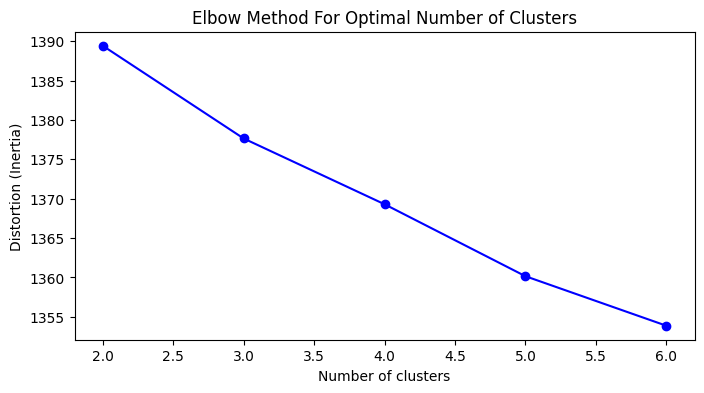

In [20]:
distortions = []
K = range(2, 7)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(vectors)
    distortions.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(vectors)

In [18]:
clusters

array([1, 1, 1, ..., 1, 3, 3])

In [29]:
from sklearn.metrics import silhouette_score

score = silhouette_score(vectors, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0082


In [43]:
dbscan = DBSCAN(eps=2.0, metric='euclidean')
clusters = dbscan.fit_predict(vectors)

In [20]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)